In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
import seaborn as sns

sns.set()
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{bm}']

In [5]:
df = pd.read_csv('run-Jan09_12-46-00_imesbv03_endovis_efficientnetb0_gaussian-tag-train_mse.csv')

print(df['Step'])
df['Value']

train_mse1 = np.array(df['Value'])
train_mse_steps1 = np.array(df['Step'])

df = pd.read_csv('run-Jan09_12-46-00_imesbv03_endovis_efficientnetb0_gaussian-tag-train_var.csv')

df['Step']
df['Value']

train_var1 = np.array(df['Value'])
train_var_steps1 = np.array(df['Step'])

df = pd.read_csv('run-Jan09_12-46-00_imesbv03_endovis_efficientnetb0_gaussian-tag-valid_mse.csv')

print(df['Step'])
df['Value']

valid_mse1 = np.array(df['Value'])
valid_mse_steps1 = np.array(df['Step'])

df = pd.read_csv('run-Jan09_12-46-00_imesbv03_endovis_efficientnetb0_gaussian-tag-valid_var.csv')

df['Step']
df['Value']

valid_var1 = np.array(df['Value'])
valid_var_steps1 = np.array(df['Step'])

0         42
1         45
2         71
3         94
4        167
       ...  
995    54647
996    54691
997    54704
998    54719
999    54799
Name: Step, Length: 1000, dtype: int64
0         18
1         42
2         45
3         71
4         94
       ...  
995    26829
996    26928
997    26945
998    26959
999    26999
Name: Step, Length: 1000, dtype: int64


In [3]:
df = pd.read_csv('run-Jan16_10-44-31_imesbv03_oct_resnet50_gaussian-tag-train_mse.csv')

df['Step']
df['Value']

train_mse2 = np.array(df['Value'])

df = pd.read_csv('run-Jan16_10-44-31_imesbv03_oct_resnet50_gaussian-tag-train_var.csv')

df['Step']
df['Value']

train_var2 = np.array(df['Value'])

df = pd.read_csv('run-Jan16_10-44-31_imesbv03_oct_resnet50_gaussian-tag-valid_mse.csv')

df['Step']
df['Value']

valid_mse2 = np.array(df['Value'])

df = pd.read_csv('run-Jan16_10-44-31_imesbv03_oct_resnet50_gaussian-tag-valid_var.csv')

df['Step']
df['Value']

valid_var2 = np.array(df['Value'])

<IPython.core.display.Javascript object>


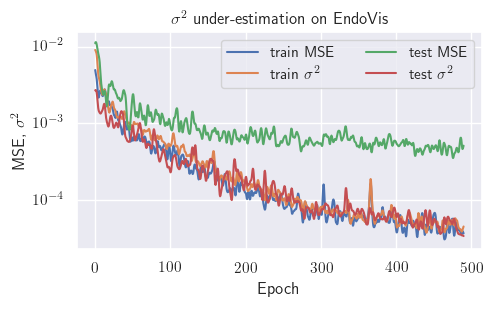

In [17]:
sigma = 2
train_mse_s1 = gaussian_filter1d(train_mse1, sigma=sigma)
train_var_s1 = gaussian_filter1d(train_var1, sigma=sigma)
valid_mse_s1 = gaussian_filter1d(valid_mse1, sigma=sigma)
valid_var_s1 = gaussian_filter1d(valid_var1, sigma=sigma)

aspect = 2/(1+np.sqrt(5))

fig, ax = plt.subplots(1, figsize=(5, 5*aspect))

deep = sns.color_palette("deep")

ax.plot(range(train_mse_s1.shape[0]-20), train_mse_s1[20:], color=deep[0], label=r'train MSE')
ax.plot(range(train_var_s1.shape[0]-20), train_var_s1[20:], color=deep[1], label=r'train $ \sigma^{2} $')
ax.plot(range(valid_mse_s1.shape[0]-20), valid_mse_s1[20:], color=deep[2], label=r'test MSE')
ax.plot(range(valid_var_s1.shape[0]-20), valid_var_s1[20:], color=deep[3], label=r'test $ \sigma^{2} $')

ax.semilogy()
ax.legend(ncol=2)
ax.set_xlabel(r'Epoch')
ax.set_ylabel(r'MSE, $ \sigma^{2} $')
ax.set_xticklabels([
    plt.Text(-100.0, 0, '$-100$'),
    plt.Text(0.0, 0, '$0$'),
    plt.Text(100.0, 0, '$100$'),
    plt.Text(200.0, 0, '$200$'),
    plt.Text(300.0, 0, '$300$'),
    plt.Text(400.0, 0, '$400$'),
    plt.Text(500.0, 0, '$500$'),
])
ax.set_title(r'$ \sigma^{2} $ under-estimation on EndoVis')

fig.tight_layout()
fig.show()
fig.savefig("sigma_overfit_endovis.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>


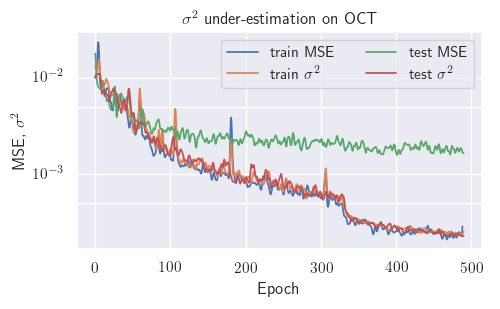

In [16]:
sigma = 2
train_mse_s2 = gaussian_filter1d(train_mse2, sigma=sigma)
train_var_s2 = gaussian_filter1d(train_var2, sigma=sigma)
valid_mse_s2 = gaussian_filter1d(valid_mse2, sigma=sigma)
valid_var_s2 = gaussian_filter1d(valid_var2, sigma=sigma)

aspect = 2/(1+np.sqrt(5))
width = 1.25

fig, ax = plt.subplots(1, figsize=(5, 5*aspect))

deep = sns.color_palette("deep")

ax.plot(range(train_mse_s2.shape[0]-23), train_mse_s2[20:-3], color=deep[0], linewidth=width, label=r'train MSE')
ax.plot(range(train_var_s2.shape[0]-20), train_var_s2[20:], color=deep[1], linewidth=width, label=r'train $ \sigma^{2} $')
ax.plot(range(valid_mse_s2.shape[0]-20), valid_mse_s2[20:], color=deep[2], linewidth=width, label=r'test MSE')
ax.plot(range(valid_var_s2.shape[0]-20), valid_var_s2[20:], color=deep[3], linewidth=width, label=r'test $ \sigma^{2} $')

ax.semilogy()
ax.legend(ncol=2)
ax.set_xlabel(r'Epoch')
ax.set_ylabel(r'MSE, $ \sigma^{2} $')
ax.set_yticks([5e-4, 1e-3, 5e-3, 1e-2])
ax.set_xticklabels([
    plt.Text(-100.0, 0, '$-100$'),
    plt.Text(0.0, 0, '$0$'),
    plt.Text(100.0, 0, '$100$'),
    plt.Text(200.0, 0, '$200$'),
    plt.Text(300.0, 0, '$300$'),
    plt.Text(400.0, 0, '$400$'),
    plt.Text(500.0, 0, '$500$'),
])
ax.set_title(r'$ \sigma^{2} $ under-estimation on OCT')

fig.tight_layout()
fig.show()
fig.savefig("sigma_overfit_oct.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>


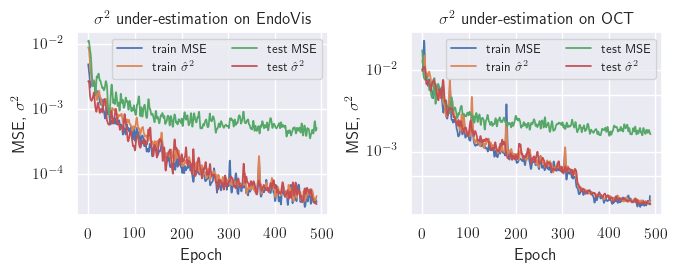

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(6.8, 2.75))
width = 1.25

deep = sns.color_palette("deep")

ax[0].plot(range(train_mse_s1.shape[0]-20), train_mse_s1[20:], color=deep[0], linewidth=width, label=r'train MSE')
ax[0].plot(range(train_var_s1.shape[0]-20), train_var_s1[20:], color=deep[1], linewidth=width, label=r'train $ \hat{\sigma}^{2} $')
ax[0].plot(range(valid_mse_s1.shape[0]-20), valid_mse_s1[20:], color=deep[2], linewidth=width, label=r'test MSE')
ax[0].plot(range(valid_var_s1.shape[0]-20), valid_var_s1[20:], color=deep[3], linewidth=width, label=r'test $ \hat{\sigma}^{2} $')

ax[0].semilogy()
ax[0].legend(ncol=2, prop={'size': 9})
ax[0].set_xlabel(r'Epoch')
ax[0].set_ylabel(r'MSE, $ \sigma^{2} $')
ax[0].set_xticks([0, 200, 400, 600, 800, 1000])
ax[0].set_xticklabels([
    plt.Text(0.0, 0, '$0$'),
    plt.Text(100.0, 0, '$100$'),
    plt.Text(200.0, 0, '$200$'),
    plt.Text(300.0, 0, '$300$'),
    plt.Text(400.0, 0, '$400$'),
    plt.Text(500.0, 0, '$500$'),
])
ax[0].set_title(r'$ \sigma^{2} $ under-estimation on EndoVis')

ax[1].plot(range(train_mse_s2.shape[0]-23), train_mse_s2[20:-3], color=deep[0], linewidth=width, label=r'train MSE')
ax[1].plot(range(train_var_s2.shape[0]-20), train_var_s2[20:], color=deep[1], linewidth=width, label=r'train $ \hat{\sigma}^{2} $')
ax[1].plot(range(valid_mse_s2.shape[0]-20), valid_mse_s2[20:], color=deep[2], linewidth=width, label=r'test MSE')
ax[1].plot(range(valid_var_s2.shape[0]-20), valid_var_s2[20:], color=deep[3], linewidth=width, label=r'test $ \hat{\sigma}^{2} $')

ax[1].semilogy()
ax[1].legend(ncol=2, prop={'size': 9})
ax[1].set_xlabel(r'Epoch')
ax[1].set_ylabel(r'MSE, $ \sigma^{2} $')
ax[1].set_yticks([5e-4, 1e-3, 5e-3, 1e-2])
ax[1].set_xticks([0, 200, 400, 600, 800, 1000])
ax[1].set_xticklabels([
    plt.Text(0.0, 0, '$0$'),
    plt.Text(100.0, 0, '$100$'),
    plt.Text(200.0, 0, '$200$'),
    plt.Text(300.0, 0, '$300$'),
    plt.Text(400.0, 0, '$400$'),
    plt.Text(500.0, 0, '$500$'),
])
ax[1].set_title(r'$ \sigma^{2} $ under-estimation on OCT')

fig.tight_layout()
fig.show()
fig.savefig("sigma_overfit.pdf", bbox_inches='tight', pad_inches=0.02)